### Laboratorio de Escalonamento ###

Neste laboratório, iremos simular o funcionamento de algoritmos de escalonamento básicos para entender melhor seu funcionamento.

Na célula abaixo, temos uma classe Processo, que tem as informações de execução, e uma classe de exemplo de escalonamento apenas com os protótipos:

(orientação a objeto em Python)


##### ALUNOS: Rávella Rodrigues / Willon Ferreira

In [11]:
import numpy as np
import random

class Processo(object):
    def __init__(self,pnome,pio,ptam,prioridade,tempoChegada,bilhetes=0):
        self.nome = pnome
        self.io = pio # Probabilidade de fazer E/S, inicialmente zero
        self.tam = ptam # Quantos Timeslices sao necessarios para terminar
        self.prio = prioridade # Prioridade, eh desnecessaria agora
        self.passo = 0
        self.chegada = 0
        
    def roda(self,quantum=None): # se rodar sem quantum, o processor roda ate o fim
        if(random.randint(1,100)<self.io): #Verifica se fez E/S
            self.tam-=1
            print(self.nome," fez e/s, falta ",self.tam)
            return 1, True #True que fez E/S
            
            
        if(quantum is None or self.tam<quantum):
            quantum = self.tam
        self.tam -=quantum
        print(self.nome," rodou por ",quantum," timeslice, faltam ",self.tam)
        return quantum, False # False se nao fez E/S

In [12]:
class Loteria(object):
    
    def __init__(self,vprontos=[]):
        self.prontos = vprontos 

    def pronto(self,Processo):
        procs.append(Processo)  
        procs.sort(key=lambda x: x.prio, reverse=True) 

    def proximo(self):
        if bilhetes != 0: seed = random.randint(1,bilhetes)
        else: seed = 0
        parametro = None 
        processo, parametro = 0, 0
        for i in range(0, len(procs)):
            parametro = parametro + procs[i].prio
            if seed <= parametro:
                proximo = procs[i]
                processo = i
                break
        procs.pop(processo)
        return proximo 

Na célula abaixo, são criados quatro processos completamente CPU-Bound que precisam de 3 timeslices para rodar.

O valor de E/S é um número entre 0 e 100 indicando quantos porcento de chance o processo tem de fazer E/S durante seu tempo na CPU

In [13]:
nprocs = 2
nomes = ['A','B']
chanceio = [0,0] #Valor de zero a cem, chance de ser entrada e saida por enquanto deixem em zero
tamanho = np.array([500, 500])
prioridade = [50, 50] # valor de ticket para loteria
bilhetes = 100       # A soma dos valores do vetor prioridade[]
saida = []
quantumCadaFila = [3,1] #O valor do quantum para cada fila no MLFQ


total = tamanho.sum()

procs = []
for i in range(0, nprocs):
    procs.append(Processo(nomes[i],chanceio[i],tamanho[i],prioridade[i],0)) #cria uma lista procs de Processos

Na célula abaixo, temos o mesmo simulador do laboratório anterior:

In [14]:
quantum = 2
tempoBloq = 1

escalonador = Loteria(procs)

bloqueados = []
boostMax = 20
contBoost = 0
tempo = 0


random.seed(1)

while total>0:
    p = escalonador.proximo()
    bilhetes -= p.prio   # Descomente para usar o escalonador Loteria.
    if(p is not None):
        rodou, _ = p.roda(quantum) #adicione quantum como parâmetro, por enquanto nao temos E/S

        p.passo+=p.prio
        
        if(p.tam>0):
            escalonador.pronto(p)
            bilhetes+=p.prio   # Descomente para usar o escalonador Loteria.
    
        total -=rodou
        tempo +=rodou
            
        if(p.tam==0):      # Descomente para usar o escalonador Loteria.
            saida.append(tempo) # Descomente para usar o escalonador Loteria.
            print(tempo)
            
    else:
        
        tempo+=1
        
unfairness = saida[0]/saida[1] # Descomente para usar o escalonador Loteria.
print(unfairness)

A  rodou por  2  timeslice, faltam  498
A  rodou por  2  timeslice, faltam  496
B  rodou por  2  timeslice, faltam  498
B  rodou por  2  timeslice, faltam  496
B  rodou por  2  timeslice, faltam  494
B  rodou por  2  timeslice, faltam  492
A  rodou por  2  timeslice, faltam  494
A  rodou por  2  timeslice, faltam  492
B  rodou por  2  timeslice, faltam  490
B  rodou por  2  timeslice, faltam  488
B  rodou por  2  timeslice, faltam  486
B  rodou por  2  timeslice, faltam  484
A  rodou por  2  timeslice, faltam  490
B  rodou por  2  timeslice, faltam  482
A  rodou por  2  timeslice, faltam  488
B  rodou por  2  timeslice, faltam  480
A  rodou por  2  timeslice, faltam  486
A  rodou por  2  timeslice, faltam  484
B  rodou por  2  timeslice, faltam  478
A  rodou por  2  timeslice, faltam  482
A  rodou por  2  timeslice, faltam  480
A  rodou por  2  timeslice, faltam  478
A  rodou por  2  timeslice, faltam  476
A  rodou por  2  timeslice, faltam  474
B  rodou por  2  timeslice, faltam  476


Nesta, temos um simulador avançado, com E/S e novos processos chegando em momentos diferentes:

### Laboratório: ###

Neste laboratório vocês (em duplas) irão implementar 3 escalonadores:

1 - MLFQ: Adicione parâmetros para definir o número de filas, o quantum de cada uma e o tempo de boost.

2 - Loteria: tem um atributo `prioridade` no Processo, use ele para definir um número aleatório de bilhetes, similar ao que ocorre com e/s e outros parämetros

3 - Stride: Similar ao loteria.



## Responda ##

#### Sobre Loteria: ####

1 - Rode a simulação mais simples com apenas dois processos, um com 100 tickets e outro com 1, com tempo 100 para terminar. O que aconteceu? O segundo processo conseguiu rodar alguma vez? Testando com outras sementes o resultado se manteve?

    R: Ambos os processos foram executados, mesmo em testes realizados com outras sementes, porém é importante ressaltar que as chances de B ser executado antes de A são cada vez menores. 

2 - Rode a simulação simples com dois processos com 100 tickets e 100 timeslices. Calcule a Unfairness para quantum=2. Repita a operação para quantum 10, 20, 50 e 100. O que aconteceu?

R: Quantum - Unfairness

    2        0.88                         
    10       0.8
    20       0.9
    50       0.5
    100      0.5
    
    
3 - Rode novamente dois processos com 100 tickets no simulador simples e quantum=2. Calcule a unfairness conforme o tamanho dos processos aumenta e faça um gráfico similar ao dos slides.

R:  Tamanho - Unfairness
    
    2         0.5
    10        0.9
    20        0.8
    50        0.86
    100       0.88
    200       0.915
    500       0.966
    1000      0.998

4 - Rode o simulador maior com três tipos de processo possíveis: um com 10 tickets, um com 20 e um com 50. O que aconteceu com os que receberam menos tickets? Eles tiveram chance de rodar?



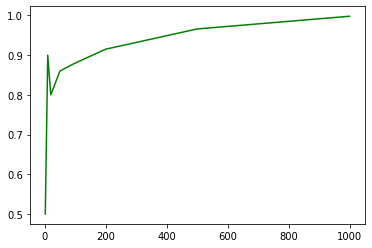

In [ ]:
import matplotlib.pyplot as plt 

x = [2, 10, 20, 50, 100, 200, 500, 1000]
y = [0.5, 0.9, 0.8, 0.86, 0.88, 0.915, 0.966, 0.998]

graf = plt.plot(x,y, 'green')


#### Sobre Stride ####

1 - Repita o cenário da 2 de loteria e faça um novo gráfico.

2 - No simulador maior, qual o efeito que ter muitos processos fazendo E/S tem no algoritmo? O que pode ser feito com a posição do processo quando ele volta de E/S?

3 - No simulador maior, rode um cenário igual para stride e loteria (com a mesma semente aleatória) e calcule tempo de resposta, de execução e __tempo de espera__ (tempo que o processo passou pronto). O que mudou entre os dois?

#### Sobre MLFQ ####

1 - Rode o MLFQ no segundo simulador com duas filas e sem boost. O que aconteceu? 

2 - Quais configurações de parâmetros transformam o MLFQ no Round Robin?

3 - Rodando no primeiro simulador, faça 1 dos quatro processos ser 100\% CPU-Bound e os outros três 60\% I/O Bound. Use a configuração com 3 filas, com 5, 3 e 1 timeslices para as fila em ordem de priorida. De quanto tempo deve ser o Boost para que o processo CPU-Bound não sofra starvation e tenha CPU 1 vez a cada 20 timeslices?

4 - Teste diversas configurações de número de filas, quantum das filas e boost no simulador maior e ache a que leva ao melhor tempo de execução.